**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json, pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Random Seed
np.random.seed(42)

class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**Dataset Path**

In [3]:
# dataset path
path = '/content/drive/MyDrive/University/Projects/NLP/Dataset/'

**Importing Dataset**

In [4]:
data = pd.read_csv(path+'NewsCategory6ClassImbalanced.csv',encoding='utf-8')
print(f'Total number of headlines: {len(data)}')
print(data.columns)
data.head(5)

Total number of headlines: 136811
Index(['headline', 'category', 'newspaper name'], dtype='object')


,headline,category,newspaper name
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Amusement,Jugantor
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Amusement,Jugantor
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor


**Dataset Distribution**

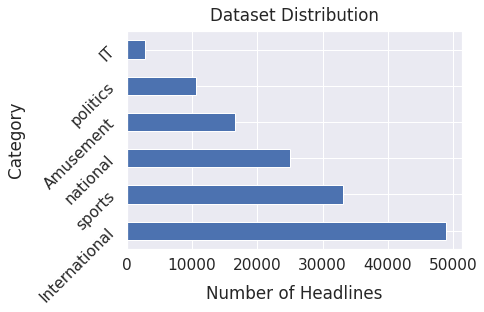

In [5]:
sns.set(font_scale=1.4)
data['category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Headlines", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

**Data Cleaning**

In [6]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(row):
      headlines = re.sub('[^\u0980-\u09FF]',' ',str(row)) #removing unnecessary punctuation
      return headlines
# Apply the function into the dataframe
data['cleaned'] = data['headline'].apply(cleaning_data)  

# print some cleaned reviews from the dataset
sample_data = [2000,5000,10000,20000,30000,40000,50000,60000,70000,80000,100000]
for i in sample_data:
  print('Original: ',data.headline[i],'\nCleaned:',
           data.cleaned[i],'\n','Category:-- ',data.category[i],'\n')

Original:  ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
Cleaned: ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
 Category:--  Amusement 

Original:  ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
Cleaned: ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
 Category:--  IT 

Original:  জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
Cleaned: জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
 Category:--  politics 

Original:  দ. কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
Cleaned: দ  কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
 Category:--  International 

Original:  ফ্লোরিডায় হামলাকারী ‘মানসিকভাবে অসুস্থ’: ট্রাম্প 
Cleaned: ফ্লোরিডায় হামলাকারী  মানসিকভাবে অসুস্থ   ট্রাম্প 
 Category:--  International 

Original:  সাকিব ফেরালেন শাই হোপকে 
Cleaned: সাকিব ফেরালেন শাই হোপকে 
 Category:--  sports 

Original:  তৃতীয়-চতুর্থ শ্রেণির নিয়োগও হবে পিএসসির মাধ্যমে 
Cleaned: তৃতীয় চতুর্থ শ্রেণির নিয়োগও হবে পিএসসির মাধ্যমে 
 Category:--  national 

Original:  নূরজাহান আমের ওজন আড়াই কেজি 
Cleaned: নূরজাহান আমের ওজন আড়াই কেজি

**Remove Low Length Data**

In [7]:
# Length of each headlines
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the headlines with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Headlines".format(len(data)-len(dataset)),
      "\nTotal Headlines:",len(dataset))
data.head(10)

After Cleaning: 
Removed 4098 Small Headlines 
Total Headlines: 132713


,headline,category,newspaper name,cleaned,length
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Amusement,Jugantor,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,7
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Amusement,Jugantor,এত দামি জুতা পরেন প্রিয়াঙ্কা,5
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,5
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,7
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,8
5,মোহিনী নাচের জাদুতে আগুন জ্বালালেন ঊর্বশী! (ভি...,Amusement,Jugantor,মোহিনী নাচের জাদুতে আগুন জ্বালালেন ঊর্বশী ভি...,7
6,প্রতারণা মামলায় সোনাক্ষীকে খুঁজছে পুলিশ,Amusement,Jugantor,প্রতারণা মামলায় সোনাক্ষীকে খুঁজছে পুলিশ,5
7,"‘ভালো অভিনেত্রী নয়, মা আদর্শ মানুষ হওয়ার পাঠ দ...",Amusement,Jugantor,ভালো অভিনেত্রী নয় মা আদর্শ মানুষ হওয়ার পাঠ দ...,9
8,এবার শুটিং সেটে সালমানকে হত্যাচেষ্টা,Amusement,Jugantor,এবার শুটিং সেটে সালমানকে হত্যাচেষ্টা,5
9,"শ্রীদেবীর মৃত্যুর ‘তদন্ত শেষ’, মৃতদেহ হস্তান্তর",Amusement,Jugantor,শ্রীদেবীর মৃত্যুর তদন্ত শেষ মৃতদেহ হস্তান্তর,6


**Dataset Analysis**

In [8]:
def data_summary(dataset):
    
    """
    This function will print the summary of the headlines and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  International
Number of Documents:47885
Number of Words:307354
Number of Unique Words:28710
Most Frequent Words:

নিহত	3398
না	2133
নিয়ে	1634
ট্রাম্প	1472
মার্কিন	1434
ও	1342
থেকে	1332
ভারতের	1212
যুক্তরাষ্ট্র	1208
ভারত	1192

Class Name :  sports
Number of Documents:30831
Number of Words:152852
Number of Unique Words:18581
Most Frequent Words:

বাংলাদেশ	1581
না	1122
জয়	883
বাংলাদেশের	873
শুরু	782
নিয়ে	689
সাকিব	672
ভারত	619
শেষ	603
দল	573

Class Name :  national
Number of Documents:24557
Number of Words:158042
Number of Unique Words:20710
Most Frequent Words:

না	1444
হবে	1292
ও	1215
প্রধানমন্ত্রী	1003
আজ	752
থেকে	617
কাদের	613
খালেদা	566
বিএনপি	557
নিয়ে	556

Class Name :  Amusement
Number of Documents:16067
Number of Words:98582
Number of Unique Words:16622
Most Frequent Words:

নতুন	1158
নিয়ে	1074
ও	1003
গান	683
ভিডিও	517
না	484
নাটক	469
খান	461
চলচ্চিত্র	416
আজ	412

Class Name :  politics
Number of Documents:10577
Number of Words:75657
Number of Unique Words:10398
Mos

**Summary Visualization**

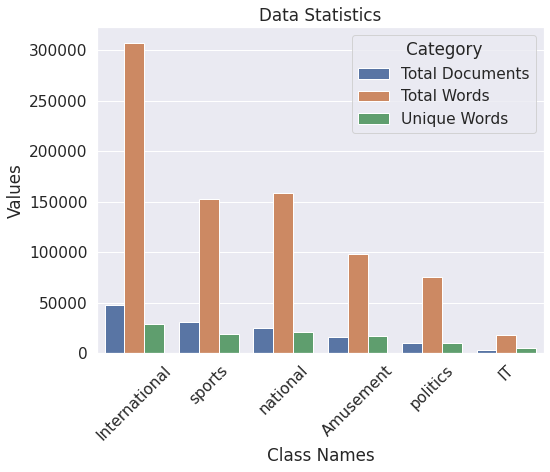

In [9]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

**Headline Length Distribution**

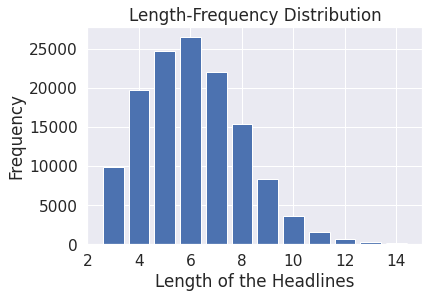

Maximum Length of a headline: 21
Minimum Length of a headline: 3
Average Length of a headline: 6.0


In [10]:
# Calculate the Review of each of the Review
dataset['HeadlineLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.HeadlineLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(2, 15)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Headlines')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a headline: {max(dataset.HeadlineLength)}")
print(f"Minimum Length of a headline: {min(dataset.HeadlineLength)}")
print(f"Average Length of a headline: {round(np.mean(dataset.HeadlineLength),0)}")

**Import BNLP Libraries**

In [11]:
!pip install bnlp-toolkit
import nltk
nltk.download('punkt')
from bnlp import NLTKTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.6 MB/s 
     |████████████████████████████████| 1.3 MB 41.9 MB/s 
     |████████████████████████████████| 965 kB 64.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


**Tokenize With BNLP**

In [12]:
sentence_tokens_list = []
word_tokens_list = []
sentences = list(dataset['cleaned'])

for i in range(len(sentences)):
    text = sentences[i]
    bnltk = NLTKTokenizer()
    
    word_tokens = bnltk.word_tokenize(text)
    word_tokens_list.append(word_tokens)
    
    sentence_tokens = bnltk.sentence_tokenize(text)
    sentence_tokens_list.append(sentence_tokens)

print("\n Sentence Tokens")
print(sentence_tokens_list[:3])

print("\n Word Tokens")
print(word_tokens_list[:3])

print("\n\n")
print("Length Of Sentence Tokens: ",len(sentence_tokens_list))
print("Length Of Word Tokens: ",len(word_tokens_list))


 Sentence Tokens
[['হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই  কেন'], ['এত দামি জুতা পরেন প্রিয়াঙ্কা'], ['মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও']]

 Word Tokens
[['হঠাৎ', 'করে', 'কেঁদে', 'ফেললেন', 'ঐশ্বরিয়া', 'রাই', 'কেন'], ['এত', 'দামি', 'জুতা', 'পরেন', 'প্রিয়াঙ্কা'], ['মৃত্যুর', 'আগে', 'শ্রীদেবীর', 'শেষ', 'ভিডিও']]



Length Of Sentence Tokens:  132713
Length Of Word Tokens:  132713


**Word To Vector**

In [13]:
import json
import os
import re
import string

from gensim.models import Word2Vec

model1 =Word2Vec(word_tokens_list, vector_size=100, window=15, min_count=1,sg=1)
model1.wv.save_word2vec_format("/tmp/myword2vec_model.txt")
print(model1)

Word2Vec(vocab=57490, vector_size=100, alpha=0.025)


**Label Encoding And Dataset Splitting Functions**

In [14]:
                           #===========================================================
                           ################# Label Encoding Function ##################
                           #=========================================================== 

def label_encoding(category,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        category: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(category)
    encoded_labels = le.transform(category)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(category[i],' ', encoded_labels[i],'\n')

    return labels

                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(headlines,category):
    """
    This function will return the splitted (90%-10%-10%) feature vector . 
    
    Args:
        headlines: sequenced headlines 
        category: encoded lables (array) 
        
    Returns:
        X_train: training data 
        X_valid: validation data
        X_test : testing feature vector 
        y_train: training encoded labels (array) 
        y_valid: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print(color.BOLD+"\nDataset Distribution:\n"+color.END)
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test


**Label Encoding And Dataset Splittng**

In [15]:
labels = label_encoding(dataset.category,True)
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(word_tokens_list,labels )


			===== Label Encoding ===== 
Class Names:--> ['Amusement' 'IT' 'International' 'national' 'politics' 'sports']
Amusement   0 

IT   1 

politics   4 

International   2 

International   2 

sports   5 

national   3 

International   2 

International   2 

International   2 

Amusement   0 


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 132713 
	Training		 95552 
	Test			 13272 
	Validation		 23889


**Text To Sequence**

In [16]:
tokenizer = Tokenizer(num_words=57490)  #num words data onujai change hbe
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_valid = tokenizer.texts_to_sequences(X_valid)

**Padding Sequence With Max Length**

In [17]:
vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)

maxlen = 21  #data onujai change hbe
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_valid = pad_sequences(X_valid, padding='post', maxlen=maxlen)

49484


In [18]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/tmp/myword2vec_model.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')

    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():

    embedding_vector = embeddings_dictionary.get(word)

    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

**Model Defination**

In [19]:
keras.backend.clear_session()
accuracy_threshold = 0.97
vocab_size = 49484
embedding_dim = 64
max_length = 21
num_category = 6
embedding_dimension = 100
input_length = 21

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/tmp/Model.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension,weights=[embedding_matrix], input_length = input_length,trainable=True),
    tf.keras.layers.Bidirectional(LSTM(32,dropout=0.2, return_sequences = True)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 100)           4948400   
                                                                 
 bidirectional (Bidirectiona  (None, 21, 64)           34048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 21, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 336)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 2022      
                                                                 
Total params: 4,985,510
Trainable params: 4,985,510
Non-trainable params: 0
______________________________________________

**Model Training**

In [20]:
num_epochs = 10
batch = 32
history = model.fit(X_train, y_train, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(X_valid, y_valid), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/10
2986/2986 [==============================] - ETA: 0s - loss: 0.5934 - accuracy: 0.7774
Epoch 1: val_accuracy improved from -inf to 0.83733, saving model to /tmp/Model.h5
2986/2986 [==============================] - 217s 71ms/step - loss: 0.5934 - accuracy: 0.7774 - val_loss: 0.4423 - val_accuracy: 0.8373
Epoch 2/10
2986/2986 [==============================] - ETA: 0s - loss: 0.3107 - accuracy: 0.8877
Epoch 2: val_accuracy improved from 0.83733 to 0.84926, saving model to /tmp/Model.h5
2986/2986 [==============================] - 207s 69ms/step - loss: 0.3107 - accuracy: 0.8877 - val_loss: 0.4208 - val_accuracy: 0.8493
Epoch 3/10
2986/2986 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9281
Epoch 3: val_accuracy did not improve from 0.84926
2986/2986 [==============================] - 204s 68ms/step - loss: 0.1959 - accuracy: 0.9281 - val_loss: 0.4660 - val_accuracy: 0.8439
Epoch 4/10
2986/2986 [==============================] - ETA: 0s - loss: 0.1422

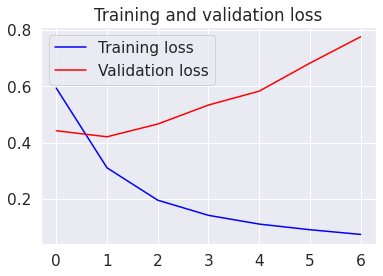

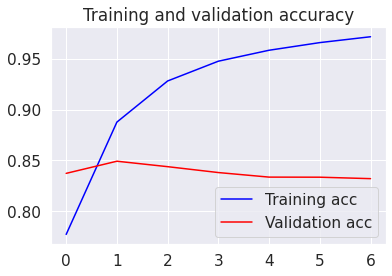

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, accuracy, 'blue', label='Training acc')
plt.plot(epochs, val_accuracy, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.show()

**Confusion Matrix**

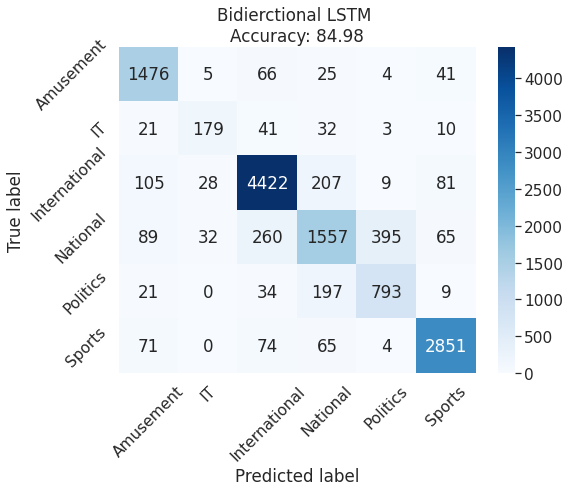

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
# load the Saved model from directory
model = load_model("/tmp/Model.h5")
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Bidierctional LSTM \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

**Classification Report**

In [23]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,82.78,91.28,86.82,1617.000000
IT,73.36,62.59,67.55,286.000000
International,90.30,91.14,90.72,4852.000000
National,74.75,64.93,69.49,2398.000000
Politics,65.65,75.24,70.11,1054.000000
Sports,93.26,93.02,93.14,3065.000000
accuracy,84.98,84.98,84.98,0.849759
macro avg,80.02,79.70,79.64,13272.000000
weighted avg,84.94,84.98,84.83,13272.000000
